In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [11]:
# Create our session (session = Session(engine)link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.

latest_dt =session.query(measurement.date).order_by(measurement.date.desc()).first()
print("Latest date in database: " , latest_dt)



Latest date in database:  ('2017-08-23',)


In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017,8, 23) - dt.timedelta(days=365)
print("One year from the last date in data set: ", year_ago)




One year from the last date in data set:  2016-08-23


In [21]:

# Perform a query to retrieve the data and precipitation scores
preci = session.query(measurement.prcp, measurement.date).\
    filter(measurement.date >= '2016-08-23', measurement.date <= '2017-08-23').\
    order_by(measurement.date).all()
preci



[(0.0, '2016-08-23'),
 (0.15, '2016-08-23'),
 (0.05, '2016-08-23'),
 (None, '2016-08-23'),
 (0.02, '2016-08-23'),
 (1.79, '2016-08-23'),
 (0.7, '2016-08-23'),
 (0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),

In [45]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(preci, columns = ['Precipitation', 'Dates'])
df.set_index('Dates')

# Sort the dataframe by date

df = pd.DataFrame(preci, columns = ['Precipitation', 'Dates'])
df.set_index('Dates', inplace=True)
df.sort_index(inplace=True)
df


,Precipitation
Dates,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


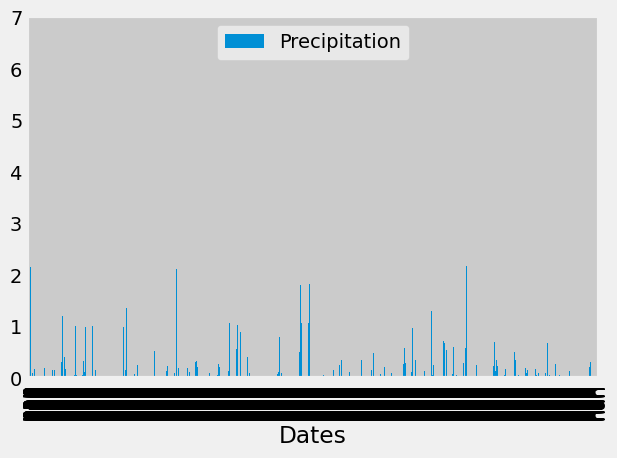

In [55]:
# Use Pandas Plotting with Matplotlib to plot the data

df = pd.DataFrame(df, columns=['Dates', 'Precipitation'])
df.set_index('Dates', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()

In [59]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [71]:
# Design a query to calculate the total number of stations in the dataset
n_stations = session.query(measurement.station).distinct().count()
n_stations

9

In [77]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_counts = session.query(measurement.station, func.count(measurement.station)).\
                 group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_counts


station_counts_df = pd.DataFrame(station_counts, columns=['Station', 'Data Count'])
station_counts_df

,Station,Data Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [91]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

low_temp = session.query(measurement.station, func.min(measurement.tobs)).\
        filter(measurement.station == 'USC00519281').all()

low_temp

max_temp = session.query(measurement.station, func.max(measurement.tobs)).\
        filter(measurement.station == 'USC00519281').all()

max_temp


avg_temp = session.query(measurement.station, func.avg(measurement.tobs)).\
        filter(measurement.station == 'USC00519281').all()

avg_temp



print(f"Temperature Minimum: {low_temp}")
print(f"Temperature Maximum: {max_temp}")
print(f"Temperature Average: {avg_temp}")


Temperature Minimum: [('USC00519281', 54.0)]
Temperature Maximum: [('USC00519281', 85.0)]
Temperature Average: [('USC00519281', 71.66378066378067)]


In [105]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_twelve = session.query(measurement.station, measurement.date, measurement.tobs)\
            .filter(measurement.station == 'USC00519281')\
            .filter(measurement.date >= '2016-08-23', measurement.date <= '2017-08-23')\
            .all()
last_twelve

last_twelve_pd = pd.DataFrame(last_twelve, columns=['Station', 'Date', 'Temperature'])

last_twelve_pd


,Station,Date,Temperature
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0
...,...,...,...
347,USC00519281,2017-08-14,77.0
348,USC00519281,2017-08-15,77.0
349,USC00519281,2017-08-16,76.0
350,USC00519281,2017-08-17,76.0


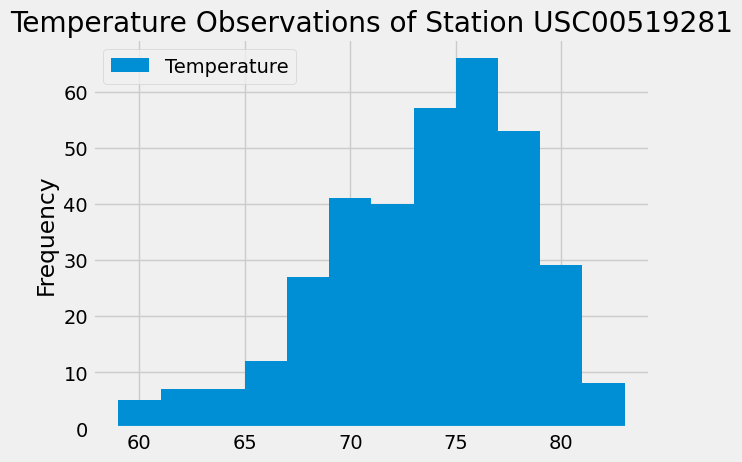

In [107]:
#plot the results as a histogram
last_twelve_pd.plot.hist(bins=12)
plt.title("Temperature Observations of Station USC00519281")
plt.show()

# Close Session

In [108]:
# Close Session
session.close()